In [1]:
 !pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=d44d8e6a4569457dedb47e1b8c4ef8704b4ab143b816560ca17513e05d9dc9e3
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [2]:
!pip install gdown

In [3]:
#Tata Motors
!gdown 'https://drive.google.com/uc?export=download&id=14Kdf2CZwt-TmS9FD35ChiwqiFm9QUowu'
#nifty50
!gdown 'https://drive.google.com/uc?export=download&id=11f8_KeYOksOF1DGIHjEBlrBWmU3GdJkk'

Downloading...
From: https://drive.google.com/uc?export=download&id=14Kdf2CZwt-TmS9FD35ChiwqiFm9QUowu
To: /content/TATAMOTORS_1d.csv
100% 222k/222k [00:00<00:00, 64.8MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=11f8_KeYOksOF1DGIHjEBlrBWmU3GdJkk
To: /content/NIFTY 50_1d.csv
100% 220k/220k [00:00<00:00, 75.5MB/s]


In [10]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import datetime as dt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [5]:
TATAMOTORS=pd.read_csv('TATAMOTORS_1d.csv', parse_dates=True, index_col='date')
TATAMOTORS.index.name = 'DateTime'
TATAMOTORS['DateTime'] = TATAMOTORS.index.date
TATAMOTORS.index = pd.to_datetime(TATAMOTORS.index)
TATAMOTORS = TATAMOTORS[~TATAMOTORS.index.duplicated(keep='first')]

In [6]:
TATAMOTORS.columns = TATAMOTORS.columns.str.lower().str.strip()

In [7]:
df=TATAMOTORS.copy()
df.rename(columns={'close': 'Close'}, inplace=True)
df.rename(columns={'high': 'High'}, inplace=True)
df.rename(columns={'low': 'Low'}, inplace=True)
df.rename(columns={'open': 'Open'}, inplace=True)
df.rename(columns={'volume': 'Volume'}, inplace=True)

# Moving Averages
df['SMA_10'] = ta.sma(df['Close'], length=10)
df['EMA_10'] = ta.ema(df['Close'], length=10)

# RSI
df['RSI_14'] = ta.rsi(df['Close'], length=14)

# MACD
macd = ta.macd(df['Close'], fast=12, slow=26, signal=9)
df = pd.concat([df, macd], axis=1)

# Bollinger Bands
bbands = ta.bbands(df['Close'], length=20, std=2)
df = pd.concat([df, bbands], axis=1)

# Stochastic Oscillator
stoch = ta.stoch(df['High'], df['Low'], df['Close'], k=14, d=3)
df = pd.concat([df, stoch], axis=1)

# Average True Range
df['ATR_14'] = ta.atr(df['High'], df['Low'], df['Close'], length=14)

# On-Balance Volume
df['OBV'] = ta.obv(df['Close'], df['Volume'])


# Daily Returns
df['Daily_Return'] = df['Close'].pct_change()

# High Low Spread
df['High_Low_Spread'] = df['High'] - df['Low']

# Close Open Spread
df['Close_Open_Spread'] = df['Close'] - df['Open']

# Price Momentum
df['Momentum_10'] = df['Close'] - df['Close'].shift(10)

# True Range
df['True_Range'] = ta.true_range(df['High'], df['Low'], df['Close'])

# Rolling Mean
df['Rolling_Mean_10'] = df['Close'].rolling(window=10).mean()

# Rolling Standard Deviation
df['Rolling_Std_10'] = df['Close'].rolling(window=10).std()

# Rolling Variance
df['Rolling_Var_10'] = df['Close'].rolling(window=10).var()

# Rolling Skewness
df['Rolling_Skew_10'] = df['Close'].rolling(window=10).skew()

# Rolling Kurtosis
df['Rolling_Kurt_10'] = df['Close'].rolling(window=10).kurt()

# Z-Score
df['Z_Score_10'] = (df['Close'] - df['Rolling_Mean_10']) / df['Rolling_Std_10']

# Lagged Close Price
df['Lag_1_Close'] = df['Close'].shift(1)
df['Lag_2_Close'] = df['Close'].shift(2)
df['Lag_3_Close'] = df['Close'].shift(3)

# Lagged Volume
df['Lag_1_Volume'] = df['Volume'].shift(1)
df['Lag_2_Volume'] = df['Volume'].shift(2)
df['Lag_3_Volume'] = df['Volume'].shift(3)

# Rolling Volatility
df['Rolling_Volatility_10'] = df['Close'].rolling(window=10).std()

# Historical Volatility
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
df['Historical_Volatility_10'] = df['Log_Return'].rolling(window=10).std() * np.sqrt(252)

# Volume Moving Average
df['Volume_MA_10'] = df['Volume'].rolling(window=10).mean()

# Vpt
df['VPT'] = (df['Volume'] * (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)).cumsum()

# Vwap
df['Cumulative_Volume'] = df['Volume'].cumsum()
df['Cumulative_Volume_Price'] = (df['Volume'] * df['Close']).cumsum()
df['VWAP'] = df['Cumulative_Volume_Price'] / df['Cumulative_Volume']

# Sharpe Ratio
df['Sharpe_Ratio'] = df['Rolling_Mean_10'] / df['Rolling_Std_10']

# Drawdown
df['Cumulative_Max'] = df['Close'].cummax()
df['Drawdown'] = (df['Close'] - df['Cumulative_Max']) / df['Cumulative_Max']

# Cumulative Return
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1

#Future Return and Signal
df['Future_Return'] = df['Close'].shift(-1) - df['Close']
df['Signal'] = np.where(df['Future_Return'] > 0, 1, 0)

print(df.tail())

ohlc_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
feature_columns = [col for col in df.columns if col not in ohlc_columns and col != 'datetime']
print(feature_columns)
features_df = df[feature_columns].copy()

min_max_scaler = MinMaxScaler()

normalized_features = min_max_scaler.fit_transform(features_df)
normalized_df = pd.DataFrame(normalized_features, columns=feature_columns, index=df.index)

standard_scaler = StandardScaler()

standardized_features = standard_scaler.fit_transform(features_df)
standardized_df = pd.DataFrame(standardized_features, columns=feature_columns, index=df.index)

final_normalized_df = pd.concat([df[ohlc_columns], normalized_df], axis=1)
final_standardized_df = pd.concat([df[ohlc_columns], standardized_df], axis=1)
final_df=pd.concat([df[ohlc_columns], normalized_df, standardized_df], axis=1)

print("Original DataFrame:")
print(final_df.tail())

print("Normalized DataFrame:")
print(final_normalized_df.tail())

print("Standardized DataFrame:")
print(final_standardized_df.tail())

print("Final DataFrame:")
print(final_df.tail())

                              Open    High      Low    Close   Volume  \
DateTime                                                                
2024-07-12 00:00:00+05:30  1023.85  1025.9  1015.00  1016.75  7339644   
2024-07-15 00:00:00+05:30  1021.35  1029.8  1017.30  1024.45  5847333   
2024-07-16 00:00:00+05:30  1025.50  1029.6  1019.20  1021.15  4824555   
2024-07-18 00:00:00+05:30  1022.95  1027.0  1008.00  1024.55  8010324   
2024-07-19 00:00:00+05:30  1024.00  1024.0   986.65   990.00  7400178   

                             datetime    SMA_10       EMA_10     RSI_14  \
DateTime                                                                  
2024-07-12 00:00:00+05:30  2024-07-12  1001.145  1002.279460  60.335569   
2024-07-15 00:00:00+05:30  2024-07-15  1003.385  1006.310467  62.316543   
2024-07-16 00:00:00+05:30  2024-07-16  1007.370  1009.008564  60.912464   
2024-07-18 00:00:00+05:30  2024-07-18  1012.260  1011.834280  61.865814   
2024-07-19 00:00:00+05:30  2024-07-19 

In [8]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'datetime', 'SMA_10',
       'EMA_10', 'RSI_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9',
       'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0',
       'STOCHk_14_3_3', 'STOCHd_14_3_3', 'ATR_14', 'OBV', 'Daily_Return',
       'High_Low_Spread', 'Close_Open_Spread', 'Momentum_10', 'True_Range',
       'Rolling_Mean_10', 'Rolling_Std_10', 'Rolling_Var_10',
       'Rolling_Skew_10', 'Rolling_Kurt_10', 'Z_Score_10', 'Lag_1_Close',
       'Lag_2_Close', 'Lag_3_Close', 'Lag_1_Volume', 'Lag_2_Volume',
       'Lag_3_Volume', 'Rolling_Volatility_10', 'Log_Return',
       'Historical_Volatility_10', 'Volume_MA_10', 'VPT', 'Cumulative_Volume',
       'Cumulative_Volume_Price', 'VWAP', 'Sharpe_Ratio', 'Cumulative_Max',
       'Drawdown', 'Cumulative_Return', 'Future_Return', 'Signal'],
      dtype='object')


Accuracy: 0.9997647202330082
****Train Results****
MSE: 66.1221%
R2: 99.9980%
****Test Results****
MSE: 841.0983%
R2: 99.9765%


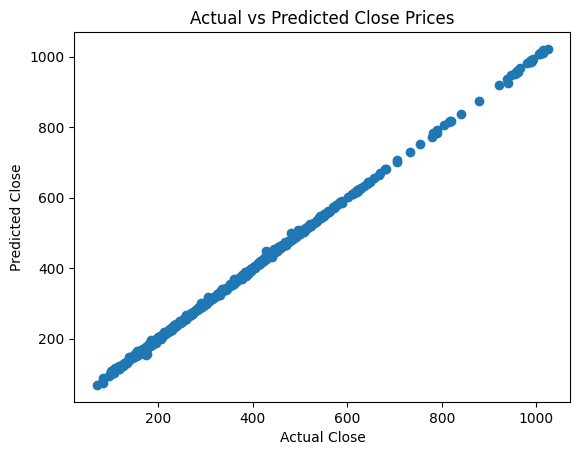

In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.dropna()

attributes = ['SMA_10', 'Close',
       'EMA_10', 'RSI_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9',
       'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0',
       'STOCHk_14_3_3', 'STOCHd_14_3_3', 'ATR_14', 'OBV', 'Daily_Return',
       'High_Low_Spread', 'Close_Open_Spread', 'Momentum_10', 'True_Range',
       'Rolling_Mean_10', 'Rolling_Std_10', 'Rolling_Var_10',
       'Rolling_Skew_10', 'Rolling_Kurt_10', 'Z_Score_10', 'Lag_1_Close',
       'Lag_2_Close', 'Lag_3_Close', 'Lag_1_Volume', 'Lag_2_Volume',
       'Lag_3_Volume', 'Rolling_Volatility_10', 'Log_Return',
       'Historical_Volatility_10', 'Volume_MA_10', 'VPT', 'VWAP',
       'Sharpe_Ratio', 'Cumulative_Max', 'Drawdown', 'Cumulative_Return']
X = df[attributes]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(200,), max_iter=5000, alpha=0.0001, activation='logistic', solver='adam', random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
y_pred_train=mlp.predict(X_train)

accuracy = mlp.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print('****Train Results****')
print("MSE: {:.4%}".format(mse_train))
print("R2: {:.4%}".format(r2_train))
print('****Test Results****')
print("MSE: {:.4%}".format(mse_test))
print("R2: {:.4%}".format(r2_test))

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.title('Actual vs Predicted Close Prices')
plt.show()


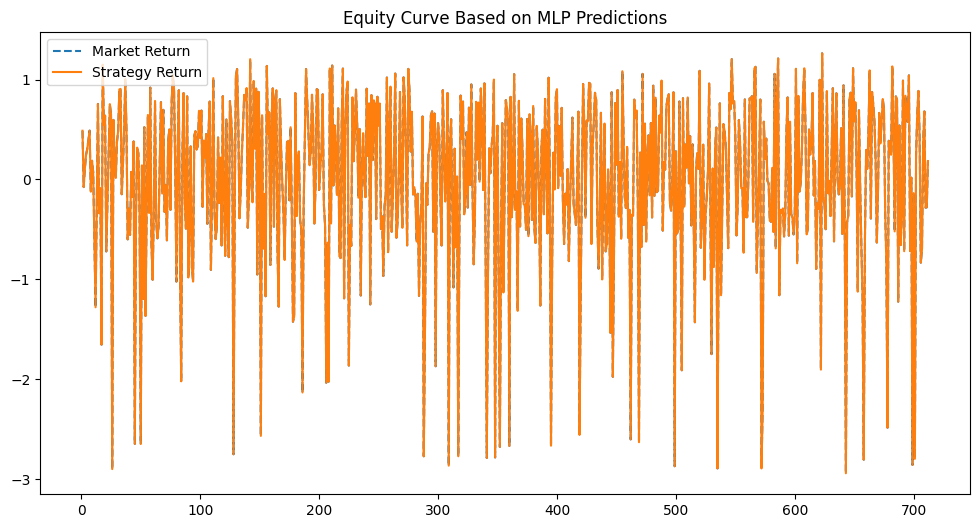

Total Strategy Return: -81.54%
Total Market Return: -81.54%


In [16]:
if isinstance(X_test, np.ndarray):
    df_test = pd.DataFrame(X_test, columns=attributes)
else:
    df_test = pd.DataFrame(X_test)

df_test['Predicted_Close'] = y_pred

df_test['Signal'] = np.where(df_test['Predicted_Close'] > df_test['Close'], 1, -1)

df_test['Daily_Return'] = df_test['Close'].pct_change()
df_test['Strategy_Return'] = df_test['Daily_Return'] * df_test['Signal'].shift(1)

df_test['Cumulative_Market_Return'] = (1 + df_test['Daily_Return']).cumprod()
df_test['Cumulative_Strategy_Return'] = (1 + df_test['Strategy_Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(df_test['Cumulative_Market_Return'], label='Market Return', linestyle='--')
plt.plot(df_test['Cumulative_Strategy_Return'], label='Strategy Return')
plt.title('Equity Curve Based on MLP Predictions')
plt.legend()
plt.show()

total_return_strategy = df_test['Cumulative_Strategy_Return'].iloc[-1] - 1
total_return_market = df_test['Cumulative_Market_Return'].iloc[-1] - 1
print(f"Total Strategy Return: {total_return_strategy * 100:.2f}%")
print(f"Total Market Return: {total_return_market * 100:.2f}%")

In [17]:
future_steps = 3
last_test_features = X_test[-1].reshape(1, -1)
future_predictions = []

for step in range(future_steps):
    next_price = mlp.predict(last_test_features)[0]
    future_predictions.append(next_price)

    next_features = last_test_features.copy()

    next_features[0, attributes.index('Lag_1_Close')] = next_price
    next_features[0, attributes.index('Lag_2_Close')] = next_features[0, attributes.index('Lag_1_Close')]
    next_features[0, attributes.index('Lag_3_Close')] = next_features[0, attributes.index('Lag_2_Close')]

    last_test_features = next_features

print(f"Predicted future prices for the next {future_steps} days: {future_predictions}")


Predicted future prices for the next 3 days: [314.91777109680254, 923.643115400796, 928.5821880478301]


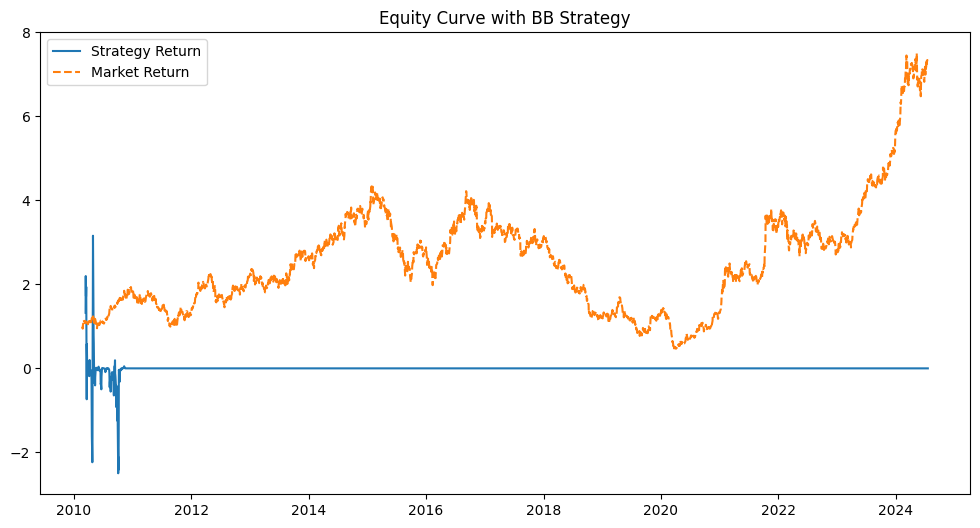

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

length = 20
mult = 2.0
df['SMA'] = df['Close'].rolling(window=length).mean()
df['STD'] = df['Close'].rolling(window=length).std()
df['Upper Band'] = df['SMA'] + (mult * df['STD'])
df['Lower Band'] = df['SMA'] - (mult * df['STD'])

df['SMA_Trend'] = df['Close'].rolling(window=50).mean()

df['Buy Signal'] = (df['Close'] < df['Lower Band']) & (df['Close'] > df['SMA_Trend'])
df['Sell Signal'] = (df['Close'] > df['Upper Band']) & (df['Close'] < df['SMA_Trend'])


stop_loss_pct = 0.02
take_profit_pct = 0.05
df['Stop Loss'] = df['Close'] * (1 - stop_loss_pct)
df['Take Profit'] = df['Close'] * (1 + take_profit_pct)

df['ATR'] = df['High'].rolling(window=14).max() - df['Low'].rolling(window=14).min()

capital = 100000
risk_per_trade = 0.01
df['Position Size'] = (capital * risk_per_trade) / df['ATR']

slippage = 0.0005
transaction_cost = 0.001
df['Entry Price With Slippage'] = df['Close'] * (1 + slippage)
df['Exit Price With Slippage'] = df['Close'] * (1 - slippage)
df['Strategy Return'] = df['Close'].pct_change() * df['Position Size'].shift(1)
df['Strategy Return'] = df['Strategy Return'] - transaction_cost

df['Cumulative Market Return'] = (1 + df['Close'].pct_change()).cumprod()
df['Cumulative Strategy Return'] = (1 + df['Strategy Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(df['Cumulative Strategy Return'], label='Strategy Return')
plt.plot(df['Cumulative Market Return'], label='Market Return', linestyle='--')
plt.title('Equity Curve with BB Strategy')
plt.legend()
plt.show()


In [19]:
print(df.tail())

                              Open    High      Low    Close    Volume  \
DateTime                                                                 
2024-07-11 00:00:00+05:30  1008.00  1025.5  1007.05  1020.80  11983571   
2024-07-12 00:00:00+05:30  1023.85  1025.9  1015.00  1016.75   7339644   
2024-07-15 00:00:00+05:30  1021.35  1029.8  1017.30  1024.45   5847333   
2024-07-16 00:00:00+05:30  1025.50  1029.6  1019.20  1021.15   4824555   
2024-07-18 00:00:00+05:30  1022.95  1027.0  1008.00  1024.55   8010324   

                             datetime    SMA_10       EMA_10     RSI_14  \
DateTime                                                                  
2024-07-11 00:00:00+05:30  2024-07-11   998.445   999.063785  61.925496   
2024-07-12 00:00:00+05:30  2024-07-12  1001.145  1002.279460  60.335569   
2024-07-15 00:00:00+05:30  2024-07-15  1003.385  1006.310467  62.316543   
2024-07-16 00:00:00+05:30  2024-07-16  1007.370  1009.008564  60.912464   
2024-07-18 00:00:00+05:30  2024

Summary of Model Performance:
MSE: 26.8544%
R2: -7.6770%
Sharpe Ratio: 89.0851
Max Drawdown: 0.0000
Cumulative Return: 5.2648


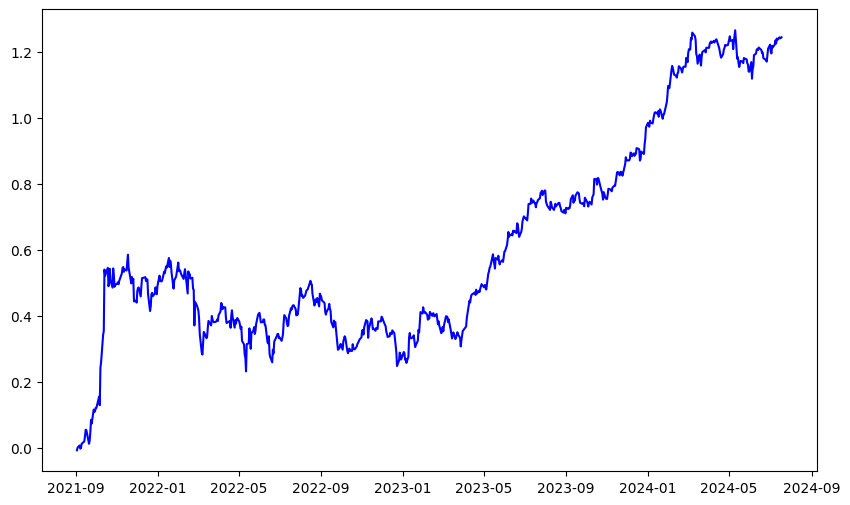

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


features = final_standardized_df.drop(columns=['Future_Return', 'Signal'])
labels = df['Signal'].dropna()

features = features.loc[labels.index]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=False)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

X_test['Returns'] = df['Log_Return'].loc[X_test.index]
X_test['Cumulative_Market_Returns'] = X_test['Returns'].cumsum()

sharpe = df['Sharpe_Ratio'].iloc[-1]
drawdown = max(df['Drawdown'])
cumulative_return = df['Cumulative_Return'].iloc[-1]

print("Summary of Model Performance:")
print("MSE: {:.4%}".format(mse_test))
print("R2: {:.4%}".format(r2_test))
print(f"Sharpe Ratio: {sharpe:.4f}")
print(f"Max Drawdown: {drawdown:.4f}")
print(f"Cumulative Return: {cumulative_return:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(X_test.index, X_test['Cumulative_Market_Returns'], label='Market Returns', color='b')


Summary of Model Performance:
MSE: 25.0224%
R2: -0.2127%
Sharpe Ratio: 0.9267
Max Drawdown: -3.9041
Cumulative Return: 1.2983


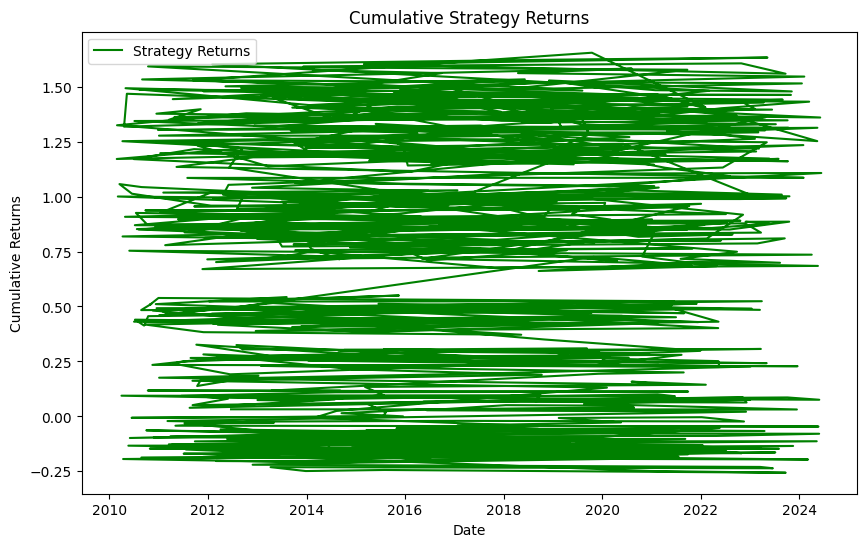

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

tscv = TimeSeriesSplit(n_splits=5)

features = final_standardized_df.drop(columns=['Future_Return', 'Signal'])
labels = df['Signal'].dropna()

features = features.loc[labels.index]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True)

rf_model = RandomForestRegressor(random_state=42)
parameter_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=parameter_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

X_test['Returns'] = df['Log_Return'].loc[X_test.index]
X_test['Strategy_Returns'] = X_test['Returns'] * np.sign(y_pred)

X_test['Cumulative_Strategy_Returns'] = (1 + X_test['Strategy_Returns']).cumprod() - 1

strategy_sharpe_ratio = X_test['Strategy_Returns'].mean() / X_test['Strategy_Returns'].std() * np.sqrt(252)

X_test['Cumulative_Strategy_Max'] = X_test['Cumulative_Strategy_Returns'].cummax()
X_test['Strategy_Drawdown'] = (X_test['Cumulative_Strategy_Returns'] - X_test['Cumulative_Strategy_Max']) / X_test['Cumulative_Strategy_Max']
max_strategy_drawdown = X_test['Strategy_Drawdown'].min()

cumulative_strategy_return = X_test['Cumulative_Strategy_Returns'].iloc[-1]

print("Summary of Model Performance:")
print("MSE: {:.4%}".format(mse_test))
print("R2: {:.4%}".format(r2_test))
print(f"Sharpe Ratio: {strategy_sharpe_ratio:.4f}")
print(f"Max Drawdown: {max_strategy_drawdown:.4f}")
print(f"Cumulative Return: {cumulative_strategy_return:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(X_test.index, X_test['Cumulative_Strategy_Returns'], label='Strategy Returns', color='g')
plt.title('Cumulative Strategy Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


In [22]:
NIFTY50 = pd.read_csv('NIFTY 50_1d.csv', parse_dates=True, index_col='date')
NIFTY50.index.name = 'DateTime'
NIFTY50['DateTime'] = NIFTY50.index.date
NIFTY50.index = pd.to_datetime(NIFTY50.index)
NIFTY50 = NIFTY50[~NIFTY50.index.duplicated(keep='first')]

In [23]:
NIFTY50.columns = NIFTY50.columns.str.lower().str.strip()

In [24]:
df1=TATAMOTORS.copy()
market=NIFTY50.copy()
df1.rename(columns={'close': 'Close'}, inplace=True)
df1.rename(columns={'high': 'High'}, inplace=True)
df1.rename(columns={'low': 'Low'}, inplace=True)
df1.rename(columns={'open': 'Open'}, inplace=True)
df1.rename(columns={'volume': 'Volume'}, inplace=True)
market.rename(columns={'close': 'Close'}, inplace=True)
market.rename(columns={'high': 'High'}, inplace=True)
market.rename(columns={'low': 'Low'}, inplace=True)
market.rename(columns={'open': 'Open'}, inplace=True)
market.rename(columns={'volume': 'Volume'}, inplace=True)

df1['Asset Returns'] = df1['Close'].pct_change()
market['Market Returns'] = market['Close'].pct_change()

df1.dropna(inplace=True)
market.dropna(inplace=True)

covariance = df1['Asset Returns'].cov(market['Market Returns'])
variance = market['Market Returns'].var()
beta = covariance / variance

print(f"Beta: {beta}")

Beta: 1.4331980697168338
